## Loading data

In [1]:
rotational_velocity_data = [ # data from rotational velocity trials: (time_s, speed, steering angle, X_g, Y_g, distance)
    (5, 70, 10, 70, 36, 69),
    (5, 70, 15, 70, 24, 66),
    (5, 70, -10, 39, 56, 66),
    (5, 70, -15, 23, 56, 57),
    (5, 85, 10, 107, 40, 105),
    (5, 85, -15, 10, 103, 104),
    (10, 70, 10, 130, 33, 130),
    (10, 70, 7, 132, 48, 137),
    (10, 70, -10, 31, 100, 106),
    (10, 70, -7, 55, 110, 123),
    (10, 85, 10, 185, 17, 185),
    (10, 85, -7, 30, 168, 170),
    (15, 70, 7, 197, 41, 196),
    (15, 70, 3, 170, 133, 196),
    (15, 70, -5, 16, 134, 146),
    (15, 70, -7, 36, 157, 167),
    (15, 85, 3, 244, 174, 297),
    (15, 85, 5, 290, 89, 306),
    (15, 85, -4, 76, 267, 271),
    (15, 85, -2, 157, 252, 286),
]





## Calculating Rotation Velocity

In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt


data_updated=[]
theta_start = math.radians(45)
for data in rotational_velocity_data:
    time_s, speed, steering_angle, X_g, Y_g, distance = data
    #calcualte the final angle
    final_angle=math.atan(Y_g/X_g)
    #calculate the angle in degrees
    # print(f"Final angle in degrees: {math.degrees(final_angle)} degrees")
    # print(f"Angle of rotation: {math.degrees(final_angle)-45} degrees")

    time_s, speed, steering_angle, X_g, Y_g, distance = data

    # --- chord angle from origin to final position ---
    phi_atan2 = math.atan2(Y_g, X_g)  # robust, handles quadrants and X_g=0 safely

    # --- circular-arc correction: chord angle = theta_start + DeltaTheta/2 ---
    delta_theta = 2.0 * (phi_atan2 - theta_start)

    # --- yaw rate ---
    w = delta_theta / time_s

    data_updated.append((time_s, speed, steering_angle, w))
    print(f"Time: {time_s}s, Speed: {speed}km/h, Steering Angle: {steering_angle}°, "
          f"X_g: {X_g}, Y_g: {Y_g}, W: {w}")


Time: 5s, Speed: 70km/h, Steering Angle: 10°, X_g: 70, Y_g: 36, W: -0.12415496285294056
Time: 5s, Speed: 70km/h, Steering Angle: 15°, X_g: 70, Y_g: 24, W: -0.18204032342727786
Time: 5s, Speed: 70km/h, Steering Angle: -10°, X_g: 39, Y_g: 56, W: 0.07082926191155012
Time: 5s, Speed: 70km/h, Steering Angle: -15°, X_g: 23, Y_g: 56, W: 0.15827583682183305
Time: 5s, Speed: 85km/h, Steering Angle: 10°, X_g: 107, Y_g: 40, W: -0.17106083317291104
Time: 5s, Speed: 85km/h, Steering Angle: -15°, X_g: 10, Y_g: 103, W: 0.27544564731598975
Time: 10s, Speed: 70km/h, Steering Angle: 10°, X_g: 130, Y_g: 33, W: -0.10736057590220775
Time: 10s, Speed: 70km/h, Steering Angle: 7°, X_g: 132, Y_g: 48, W: -0.08732543196270826
Time: 10s, Speed: 70km/h, Steering Angle: -10°, X_g: 31, Y_g: 100, W: 0.09695849867101058
Time: 10s, Speed: 70km/h, Steering Angle: -7°, X_g: 55, Y_g: 110, W: 0.06435011087932843
Time: 10s, Speed: 85km/h, Steering Angle: 10°, X_g: 185, Y_g: 17, W: -0.13875272352718723
Time: 10s, Speed: 85km

## Fitting Steering commands to rotational velocity:

Linear fit function: w = -0.0128 * steering_angle + 0.0016


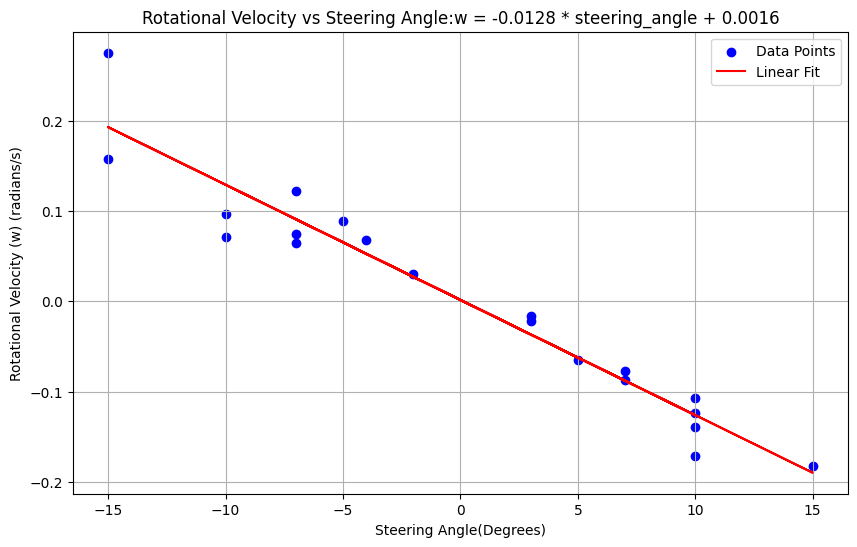

In [3]:
#fitting the steering angle and angula velocity data to a linear model
steering_angles = np.array([d[2] for d in data_updated])
angular_velocities = np.array([d[3] for d in data_updated])
coefficients = np.polyfit(steering_angles, angular_velocities, 1)
linear_fit_rotation_velocity_steering = np.poly1d(coefficients)
#printing the function:
linear_fit_rotation_velocity_steering_func = f"w = {coefficients[0]:.4f} * steering_angle + {coefficients[1]:.4f}"
print(f"Linear fit function: w = {coefficients[0]:.4f} * steering_angle + {coefficients[1]:.4f}")
# Plotting the data points and the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(steering_angles, angular_velocities, c='blue', label='Data Points')
plt.plot(steering_angles, linear_fit_rotation_velocity_steering(steering_angles), c='red', label='Linear Fit')
plt.title('Rotational Velocity vs Steering Angle:' + linear_fit_rotation_velocity_steering_func)   
plt.xlabel('Steering Angle(Degrees)')
plt.ylabel('Rotational Velocity (w) (radians/s)')
plt.grid()
plt.legend()
plt.show()


Linear fit function: w = 0.0010 * speed + -0.0765


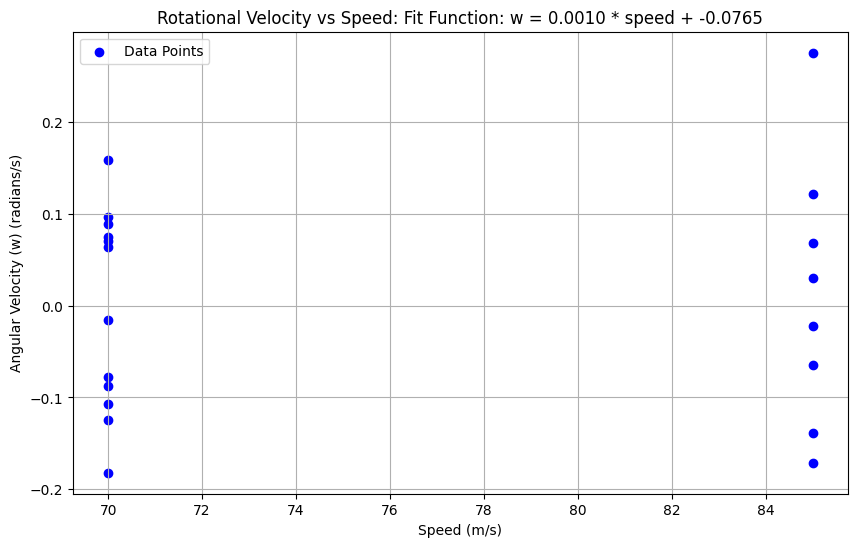

In [4]:
#fitting the steering angle and angula velocity data to a linear model
speed_values = np.array([d[1] for d in data_updated])
angular_velocities = np.array([d[3] for d in data_updated])
coefficients = np.polyfit(speed_values, angular_velocities, 1)
linear_fit_rotation_velocity_speed = np.poly1d(coefficients)
#print the functions:
linear_fit_rotation_velocity_speed_func = f"w = {coefficients[0]:.4f} * speed + {coefficients[1]:.4f}"
print(f"Linear fit function: w = {coefficients[0]:.4f} * speed + {coefficients[1]:.4f}")
# Plotting the data points and the linear fit
plt.figure(figsize=(10, 6))
plt.scatter(speed_values, angular_velocities, c='blue', label='Data Points')
# plt.plot(speed_values, linear_fit_rotation_velocity_speed(speed_values), c='red', label='Linear Fit')
plt.title('Rotational Velocity vs Speed: Fit Function: ' + linear_fit_rotation_velocity_speed_func)   
plt.xlabel('Speed (m/s)')
plt.ylabel('Angular Velocity (w) (radians/s)')
plt.grid()
plt.legend()
plt.show()


## Variance: Sigma squared vs steering angle

Steering Angle: 10 degrees, Predicted w: -0.1260 radians/s, Actual w: -0.1242 radians/s, Error^2: 0.0000 radians/s
Steering Angle: 15 degrees, Predicted w: -0.1898 radians/s, Actual w: -0.1820 radians/s, Error^2: 0.0001 radians/s
Steering Angle: -10 degrees, Predicted w: 0.1292 radians/s, Actual w: 0.0708 radians/s, Error^2: 0.0034 radians/s
Steering Angle: -15 degrees, Predicted w: 0.1930 radians/s, Actual w: 0.1583 radians/s, Error^2: 0.0012 radians/s
Steering Angle: 10 degrees, Predicted w: -0.1260 radians/s, Actual w: -0.1711 radians/s, Error^2: 0.0020 radians/s
Steering Angle: -15 degrees, Predicted w: 0.1930 radians/s, Actual w: 0.2754 radians/s, Error^2: 0.0068 radians/s
Steering Angle: 10 degrees, Predicted w: -0.1260 radians/s, Actual w: -0.1074 radians/s, Error^2: 0.0003 radians/s
Steering Angle: 7 degrees, Predicted w: -0.0877 radians/s, Actual w: -0.0873 radians/s, Error^2: 0.0000 radians/s
Steering Angle: -10 degrees, Predicted w: 0.1292 radians/s, Actual w: 0.0970 radians

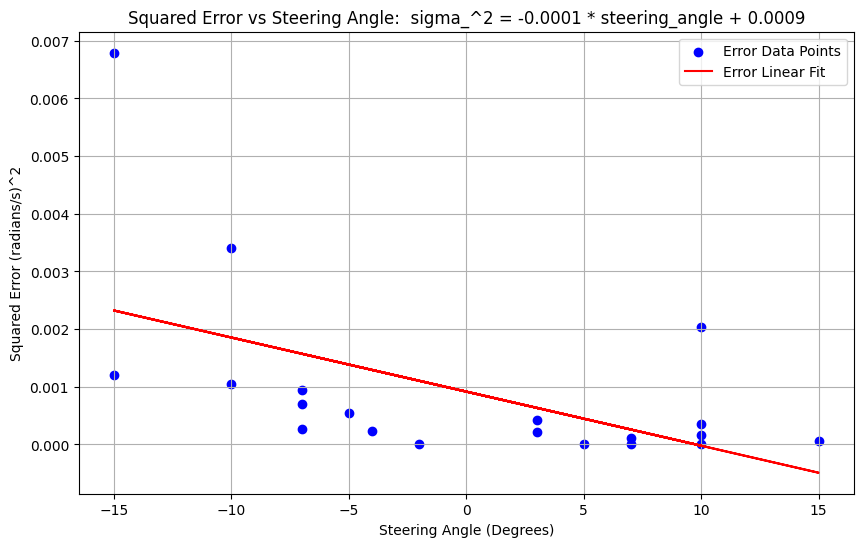

In [5]:
variance_data_steering_angle = []
variance_data_speed_angle = []


for data in data_updated:
    steering_angles=data[2]
    predicted_anglular_velocity=linear_fit_rotation_velocity_steering(steering_angles)
    error_steering=predicted_anglular_velocity-data[3]
    error_steering_squared=error_steering**2
    print(f"Steering Angle: {steering_angles} degrees, Predicted w: {predicted_anglular_velocity:.4f} radians/s, Actual w: {data[3]:.4f} radians/s, Error^2: {error_steering_squared:.4f} radians/s")
    variance_data_speed_angle.append((steering_angles, data[3], predicted_anglular_velocity,error_steering_squared))
    

##plotting the error for the steering angle linear fit
steering_angles = [d[0] for d in variance_data_speed_angle]
errors_steering_angle = [d[3] for d in variance_data_speed_angle]
plt.figure(figsize=(10, 6))
plt.scatter(steering_angles, errors_steering_angle, c='blue', label='Error Data Points')
plt.xlabel('Steering Angle (Degrees)')

#fitting a line to the error data
error_coefficients_steering = np.polyfit(steering_angles, errors_steering_angle, 1)
error_linear_fit_steering = np.poly1d(error_coefficients_steering)
print(f"Error Linear fit function: sigma_^2 = {error_coefficients_steering[0]:.4f} * steering_angle + {error_coefficients_steering[1]:.4f}")
plt.plot(steering_angles, error_linear_fit_steering(steering_angles), c='red', label='Error Linear Fit')
plt.ylabel('Squared Error (radians/s)^2')
plt.title('Squared Error vs Steering Angle: '+ f" sigma_^2 = {error_coefficients_steering[0]:.4f} * steering_angle + {error_coefficients_steering[1]:.4f}")
plt.grid()
plt.legend()
plt.show()


In [ ]:
## CODE TO GET THE TIME DURATION OF EACH PICKLE FILE

In [10]:
import os
import robot_python_code  # Assumes this is in your folder

def get_active_duration(filename):
    """
    Loads a pickle file and calculates duration based on 
    actual movement (velocity > 0.1).
    """
    try:
        data_loader = robot_python_code.DataLoader(filename)
        data_dict = data_loader.load()

        time_list = data_dict['time']
        control_signal_list = data_dict['control_signal']
        
        # Velocity is the first element [0] in each control signal row
        velocity_list = [row[0] for row in control_signal_list]
        # print(velocity_list)
        # Find indices where the robot was actually commanded to move
        # We use 0.1 as a threshold to ignore minor noise or rounding errors
        moving_indices = [i for i, v in enumerate(velocity_list) if abs(v) > 10]

        if not moving_indices:
            return 0.0, 0.0, 0.0 # No movement found

        start_idx = moving_indices[0]
        end_idx = moving_indices[-1]

        start_time = time_list[start_idx]
        end_time = time_list[end_idx]
        actual_duration = end_time - start_time

        return actual_duration, start_time, end_time

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

def main():
    # Update this path to where your pickle files are located
    directory = './data_stage4/' 
    
    # Get all .pkl files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.pkl')]
    files.sort() # Sort by filename/timestamp

    print(f"{'Filename':<50} | {'Active Duration':<15}")
    print("-" * 70)

    for filename in files:
        full_path = os.path.join(directory, filename)
        result = get_active_duration(full_path)
        
        if result:
            duration, start, end = result
            print(f"{filename:<50} | {duration:>10.2f} seconds")

if __name__ == "__main__":
    main()

Filename                                           | Active Duration
----------------------------------------------------------------------
robot_data_70_0_06_02_26_21_54_37.pkl              |       4.88 seconds
robot_data_70_0_06_02_26_21_56_10.pkl              |       6.93 seconds
robot_data_70_0_06_02_26_21_57_17.pkl              |       6.84 seconds
robot_data_70_0_06_02_26_21_58_39.pkl              |       9.95 seconds
robot_data_70_0_06_02_26_22_00_18.pkl              |       9.81 seconds
robot_data_70_0_06_02_26_22_01_56.pkl              |       9.91 seconds
robot_data_70_0_06_02_26_22_02_51.pkl              |       9.81 seconds
robot_data_70_0_06_02_26_22_04_10.pkl              |      14.87 seconds
robot_data_70_0_06_02_26_22_06_05.pkl              |      14.90 seconds
robot_data_70_0_06_02_26_22_08_03.pkl              |      14.96 seconds
robot_data_70_0_06_02_26_22_09_53.pkl              |      19.92 seconds
robot_data_70_0_06_02_26_22_11_49.pkl              |      19.83 seco